In [1]:
import pickle
import numpy as np
import os
import pandas as pd
base_dir = "C://DATA//train//49_kaggle//KaggleFun//Sales//DATA"
train_ds = pickle.load(open( os.path.join(base_dir,"train_15.pkl"), "rb" ) )
test_ds = pickle.load(open( os.path.join(base_dir,"test_15.pkl"), "rb" ) )

In [3]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_ds[:,:-1] = scaler.fit_transform(train_ds[:,:-1])
# test_ds[:,:-1] = scaler.transform(test_ds[:,:-1])

In [2]:
train_x = train_ds[:,:-1]
train_y = train_ds[:,-1]

test_x = test_ds[:,:-1]
test_y = test_ds[:,-1]

In [11]:
from sklearn.metrics import mean_squared_error as mse

def eva(model):
    y0 = model.predict(train_x).astype(np.int64)
    y1 = model.predict(test_x).astype(np.int64)
    print("Train MSE: {}, Test MSE: {}".format(mse(train_y, y0), mse(test_y, y1)))

In [4]:
del train_ds, test_ds

In [5]:
from xgboost import XGBRegressor
learning_rate = 0.005
max_depth = 5
n_estimators = 300

xgb_model=XGBRegressor(learning_rate=learning_rate,min_child_weight=1, max_depth=max_depth, n_estimators=n_estimators)
xgb_model.fit(train_x,train_y, verbose=True, eval_metric="rmse")
eva(xgb_model) # the printed one is not rounded (ie. float instead of int)

C:\Users\alvan_li\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:09:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Train MSE: 5.1130124483269, Test MSE: 22.0358209764028


In [12]:
eva(xgb_model)

Train MSE: 5.166281663915709, Test MSE: 22.067433258092347


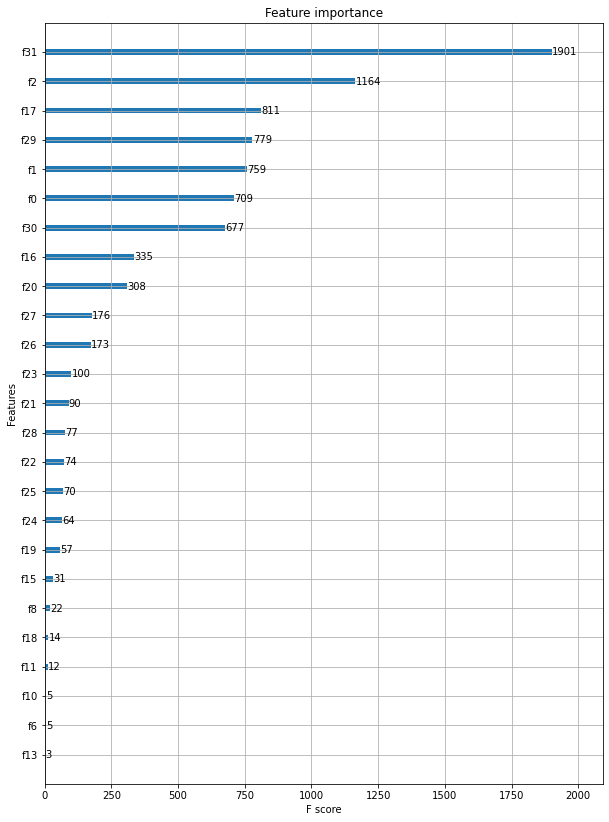

In [7]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(xgb_model, (10,14))
plt.show()